# IMPORT THƯ VIỆN


In [55]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# ĐỌC DỮ LIỆU


In [56]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

DATA = pd.read_csv(
    'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
)

DATA.replace('?', pd.NA, inplace=True)

DATA['num'] = DATA['num'].apply(lambda x: 1 if x>0 else 0)

DATA


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Thống kê mô tả các đặc trưng số liệu

In [57]:
DATA.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [58]:
print(DATA.columns.values)


['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'num']


**Mô tả biến**
- `age`: Tuổi (năm)
- `sex`: Giới tính bệnh nhân
- `cp`: Loại đau ngực
- `trestbps`: Huyết áp khi nghỉ (mmHg)
- `chol`: Lượng cholesterol trong huyết thanh (mg/dl)
- `fbs`: Đường huyết lúc đói > 120 mg/dl (1 = có; 0 = không)
- `restecg`: Kết quả điện tâm đồ khi nghỉ
- `thalach`: Nhịp tim tối đa đạt được
- `exang`: Đau thắt ngực do gắng sức (1 = có; 0 = không)
- `oldpeak`: Mức chênh ST do gắng sức so với lúc nghỉ
- `slope`: Độ dốc đoạn ST khi gắng sức
- `ca`: Số mạch máu lớn được nhuộm (0–3)
- `thal`: 3 = bình thường; 6 = tổn thương cố định; 7 = tổn thương hồi phục
- `num`: Chẩn đoán bệnh tim (giá trị mục tiêu)



**Phân loại biến**
- **Biến phân loại (Categorical):**  
  `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`

- **Biến số (Numeric):**  
  `age`, `trestbps`, `chol`, `thalach`, `oldpeak`, `num`


# Kiểm tra dữ liệu thiếu và ngoại lai


In [59]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())


Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
------------------------------------
Infinity Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


### Nhận xét về dữ liệu thiếu và giá trị vô cực

- Một số cột có giá trị thiếu, cụ thể là `ca` (4 giá trị) và `thal` (2 giá trị), nhưng tỷ lệ thiếu không lớn.
- Không có giá trị vô cực trong bất kỳ cột nào.
- Tùy vào mục đích phân tích, có thể:
  - Xoá các dòng chứa giá trị thiếu, hoặc
  - Điền giá trị thay thế bằng các phương pháp như trung vị, mode, hoặc mô hình dự đoán.


In [60]:
df_clean = DATA.dropna()
df_clean


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


# Trực quan hóa mối quan hệ giữa các biến số

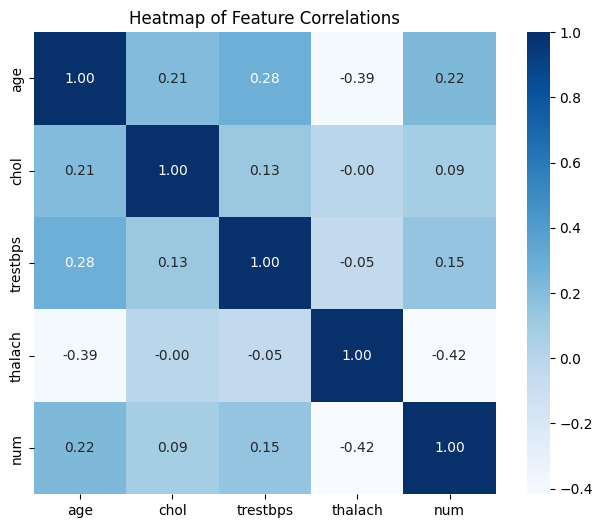

In [61]:
selected_columns = ['age', 'chol', 'trestbps','thalach','num']
corr = DATA[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()


# CÁC BIẾN PHÂN LOẠI


In [62]:
import matplotlib.pyplot as plt
def histogram(variable):
    """
    input: variable ex:"Age"
    output: histogram & value count
    """
    var = DATA[variable]

    varValue = var.value_counts()

    plt.figure(figsize=(8,3))
    plt.hist(var, bins=20, color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    var = DATA[variable]

    varValue = var.value_counts()

    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))


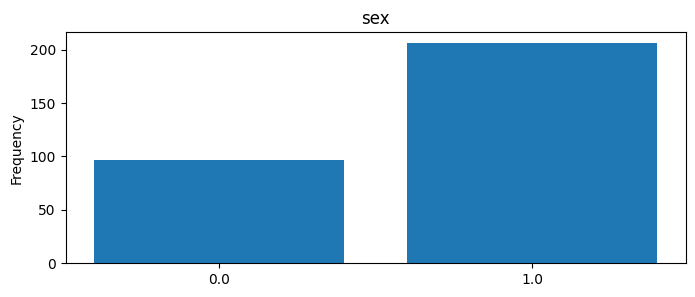

sex: 
sex
1.0    206
0.0     97
Name: count, dtype: int64


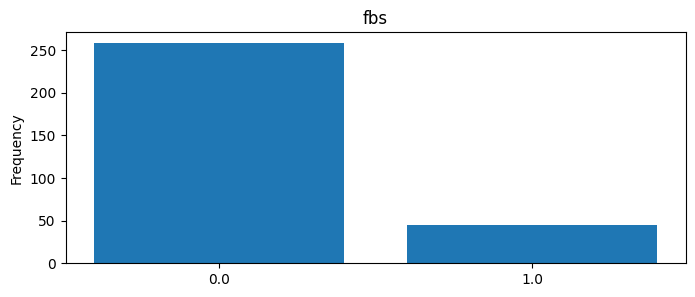

fbs: 
fbs
0.0    258
1.0     45
Name: count, dtype: int64


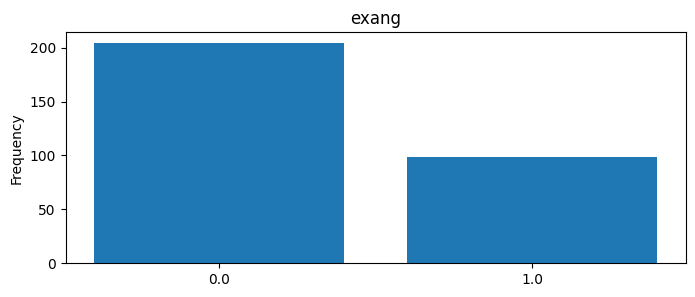

exang: 
exang
0.0    204
1.0     99
Name: count, dtype: int64


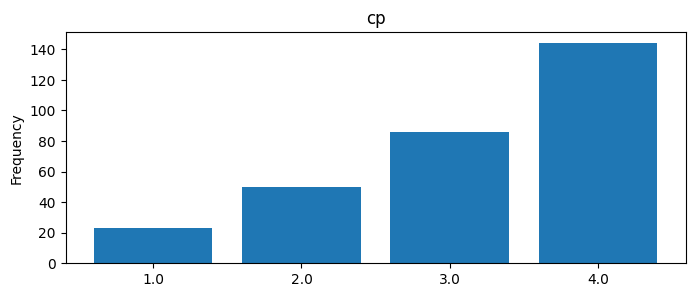

cp: 
cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64


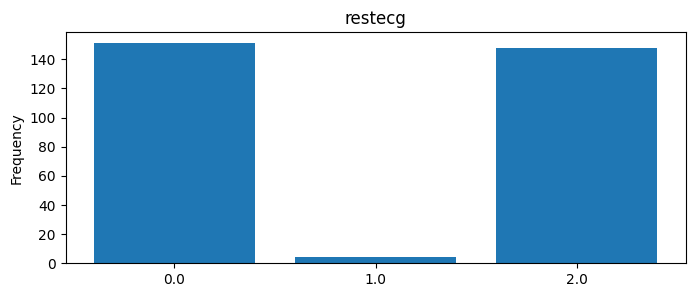

restecg: 
restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64


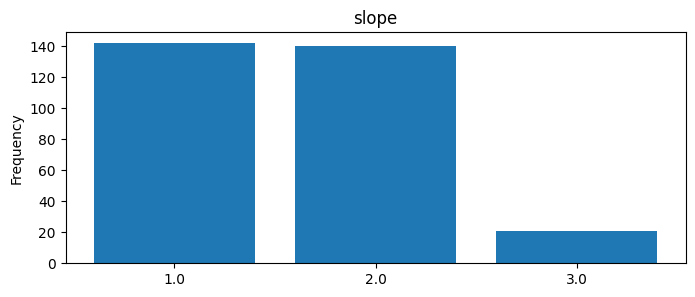

slope: 
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64


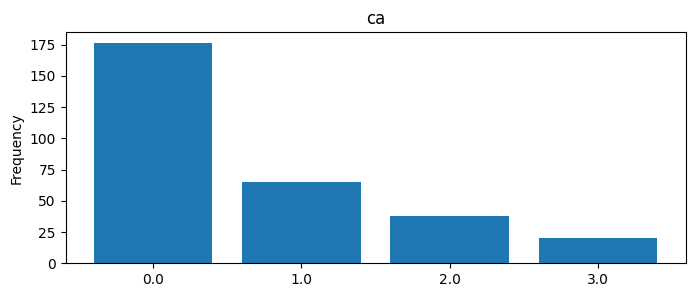

ca: 
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


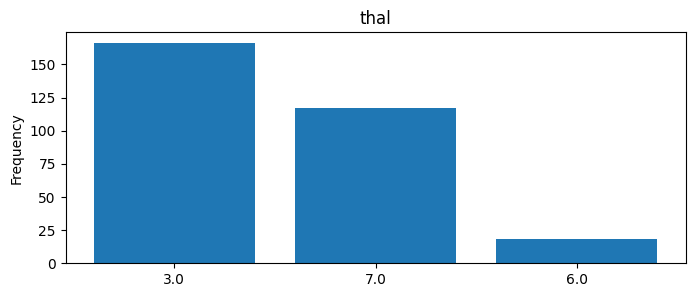

thal: 
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64


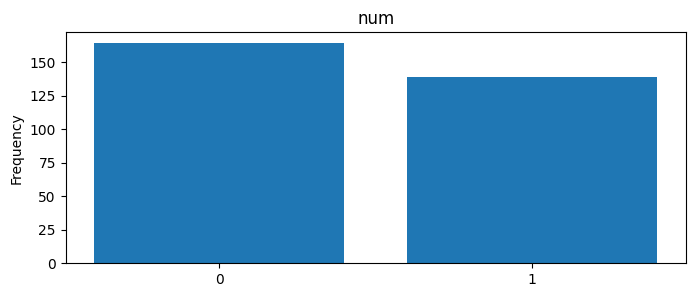

num: 
num
0    164
1    139
Name: count, dtype: int64


In [63]:
category1=['sex', 'fbs', 'exang','cp','restecg', 'slope', 'ca', 'thal', 'num']
for c in category1:
    bar_plot(c)


# CÁC BIẾN SỐ TÍNH


In [64]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()


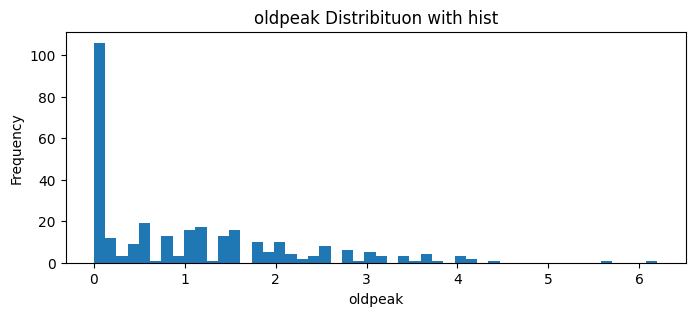

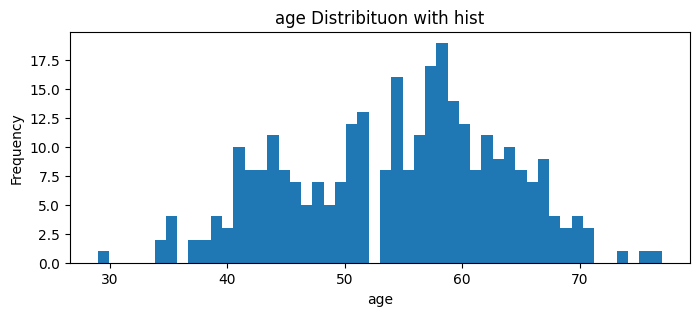

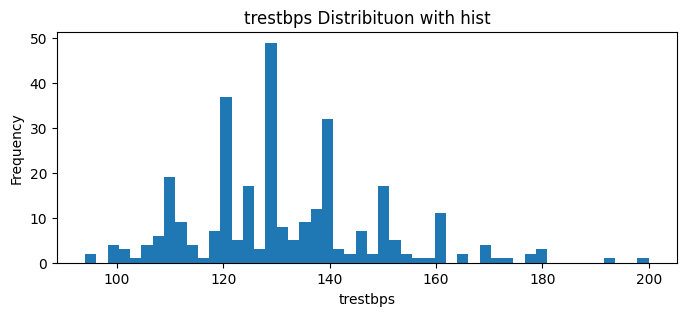

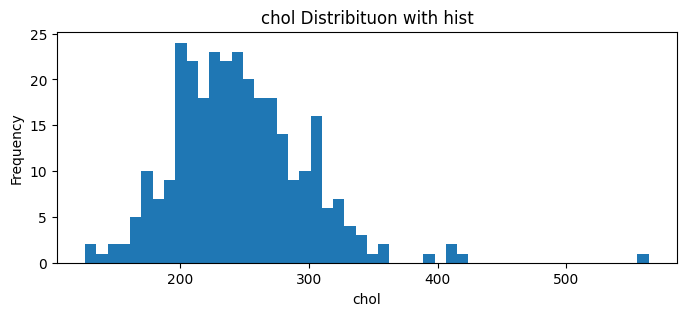

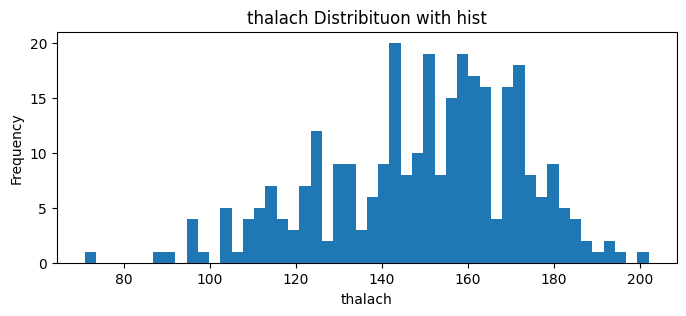

In [65]:
numericVar=['oldpeak', 'age', 'trestbps', 'chol', 'thalach']
for n in numericVar:
    plot_hist(n)


# PHÂN TÍCH DỮ LIỆU CƠ BẢN

In [66]:
DATA[["sex","num"]]


,sex,num
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,0
4,0.0,0
...,...,...
298,1.0,1
299,1.0,1
300,1.0,1
301,0.0,1


In [67]:
DATA[["exang","num"]].groupby(["exang"],as_index = False).mean().sort_values(by='num', ascending=False)


,exang,num
1,1.0,0.767677
0,0.0,0.308824


In [68]:
DATA[["cp","num"]].groupby(["cp"],as_index = False).mean().sort_values(by='num', ascending=False)


,cp,num
3,4.0,0.729167
0,1.0,0.304348
2,3.0,0.209302
1,2.0,0.180000


In [69]:
DATA[["restecg","num"]].groupby(["restecg"],as_index = False).mean().sort_values(by='num', ascending=False)


,restecg,num
1,1.0,0.750000
2,2.0,0.540541
0,0.0,0.370861


In [70]:
DATA[["slope","num"]].groupby(["slope"],as_index = False).mean().sort_values(by='num', ascending=False)


,slope,num
1,2.0,0.650000
2,3.0,0.571429
0,1.0,0.253521


In [71]:
DATA[["ca","num"]].groupby(["ca"],as_index = False).mean().sort_values(by='num', ascending=False)


,ca,num
3,3.0,0.850000
2,2.0,0.815789
1,1.0,0.676923
0,0.0,0.261364


In [72]:
DATA[["sex","num"]].groupby(["sex"],as_index = False).mean().sort_values(by='num', ascending=False)


,sex,num
1,1.0,0.553398
0,0.0,0.257732


# PHÂN LOẠI BỆNH TIM BẰNG CÂY QUYẾT ĐỊNH

## Từ Phân Tích Khám Phá Dữ Liệu (EDA) đến Mô Hình Phân Loại

Một số điểm chính:

- **Dữ liệu thiếu**: Bộ dữ liệu có các giá trị thiếu ở hai cột `ca` và `thal`, cần được xử lý trước khi xây dựng mô hình.

- **Tương quan giữa các đặc trưng**: Biểu đồ nhiệt (*heatmap*) cho thấy có mối quan hệ giữa các đặc trưng như `tuổi`, `cholesterol` và biến mục tiêu.

- **Phân phối dữ liệu**: Chúng tôi đã phân tích các đặc trưng phân loại và đặc trưng số để hiểu rõ hơn về phân phối của chúng.

- **Tầm quan trọng của đặc trưng**: Một số đặc trưng như `sex`, `exang`, và `cp` thể hiện mối tương quan mạnh với bệnh tim.



# Nhập các thư viện phân loại 

In [73]:
import pandas as pd
import graphviz
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Image
from IPython.display import Markdown, display as ds
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# ĐỌC DỮ LIỆU VÀ TIỀN XỬ LÝ CHO PHÂN LOẠI

## Chuẩn bị dữ liệu dựa trên các phát hiện từ EDA


In [74]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

df = pd.read_csv(
    r'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
    na_values = '?'
)

y = df['num'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('num', axis = 1)

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# TRAIN SPLIT TEST


In [75]:
df.dropna(
    subset=[
        'age','sex','cp','trestbps','chol','fbs',
        'restecg','thalach','exang','oldpeak','slope','ca','thal'
    ],
    inplace=True
)

df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

df = pd.get_dummies(
    df,
    columns=['sex','cp','restecg','slope','thal'],
    drop_first=True
)

df


,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,True,False,False,False,False,True,False,True,True,False
1,67.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,True,False,False,True,False,True,True,False,False,False
2,67.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,True,False,False,True,False,True,True,False,False,True
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,True,False,True,False,False,False,False,True,False,False
4,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,1,False,False,False,True,False,False,True,False,False,True
298,45.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,True,False,False,False,False,False,True,False,False,True
299,68.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,1,True,False,False,True,False,False,True,False,False,True
300,57.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,1,True,False,False,True,False,False,True,False,False,True


In [76]:
ratios = [
    (0.4, 0.6),
    (0.6, 0.4),
    (0.8, 0.2),
    (0.9, 0.1),
]

subsets = {}

for tr, te in ratios:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, 
        train_size = tr, 
        stratify = y, 
        random_state = 42
    )
    key = f'{int(tr * 100)}/{int(te * 100)}'
    subsets[key] = {
        'X_train': X_tr, 'y_train': y_tr,
        'X_test' : X_te, 'y_test' : y_te,
    }

print("Finish to create subsets:", list(subsets.keys()))


Finish to create subsets: ['40/60', '60/40', '80/20', '90/10']


# TRAIN/TEST SPLIT DISTRIBUTION ANALYSIS


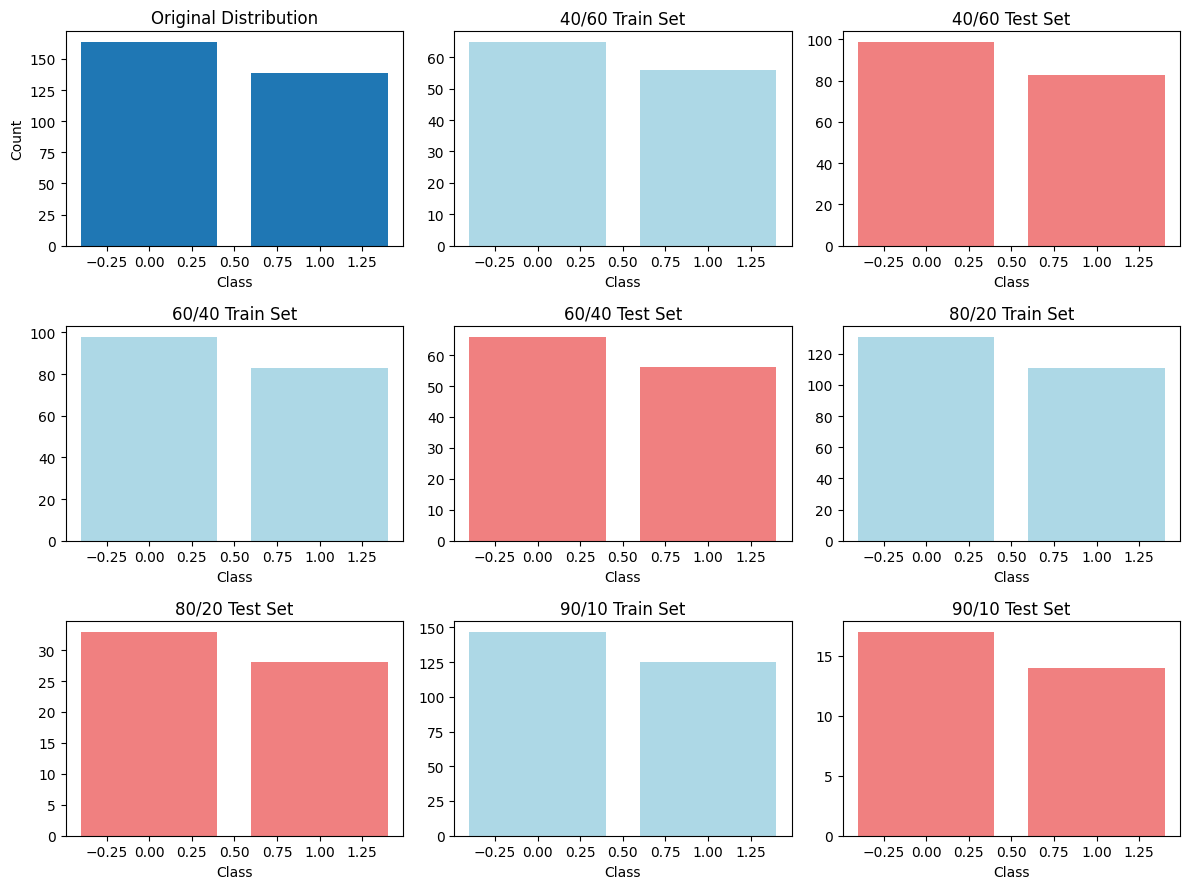

In [77]:
def plot_all_distributions(y, subsets):
    n_plots = 1 + len(subsets)*2   
    cols = 3
    rows = (n_plots + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()

    cnt = y.value_counts().sort_index()
    axes[0].bar(cnt.index, cnt.values)
    axes[0].set_title('Original Distribution')
    axes[0].set_xlabel('Class'); axes[0].set_ylabel('Count')

    idx = 1
    for key, data in subsets.items():
        cnt = data['y_train'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values, color='lightblue')
        axes[idx].set_title(f'{key} Train Set')
        axes[idx].set_xlabel('Class')
        idx += 1
        cnt = data['y_test'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values, color='lightcoral')
        axes[idx].set_title(f'{key} Test Set')
        axes[idx].set_xlabel('Class')
        idx += 1

    for ax in axes[idx:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_all_distributions(y, subsets)


## Nhận xét về phân bố nhãn qua các biểu đồ (Heart Disease Dataset)

- Các biểu đồ cột thể hiện phân bố nhãn (Class: 0 = Không bệnh, 1 = Có bệnh) trong tập dữ liệu gốc, các tập train và test ở từng tỷ lệ chia (40/60, 60/40, 80/20, 90/10).
- Ở tất cả các tập train và test, tỷ lệ giữa hai lớp luôn được duy trì gần như giống với tập dữ liệu gốc. Điều này chứng tỏ quá trình chia tách dữ liệu đã sử dụng tham số `stratify`, đảm bảo mỗi lớp đều được đại diện đầy đủ trong từng tập con.
- Không có lớp nào bị thiếu hoặc bị lệch tỷ lệ trong bất kỳ tập con nào, kể cả với các tỷ lệ chia nhỏ như 90/10.
- Việc trực quan hóa này xác nhận rằng các tập dữ liệu đã được chuẩn bị hợp lý, đảm bảo tính khách quan và đại diện cho toàn bộ dữ liệu khi huấn luyện và đánh giá mô hình.
- Nhờ đó, mô hình sẽ không bị thiên lệch về một lớp cụ thể, giúp đánh giá hiệu suất công bằng và chính xác hơn.

# 4. HUẤN LUYỆN MÔ HÌNH CÂY QUYẾT ĐỊNH

- Sử dụng DecisionTreeClassifier với tiêu chí entropy (information gain).
- Huấn luyện trên từng tập train đã chia.

In [78]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf1.fit(subsets['40/60']['X_train'], subsets['40/60']['y_train'])

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf2.fit(subsets['60/40']['X_train'], subsets['60/40']['y_train'])

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [80]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf3.fit(subsets['80/20']['X_train'], subsets['80/20']['y_train'])

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [81]:
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf4.fit(subsets['90/10']['X_train'], subsets['90/10']['y_train'])

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Trực quan hóa cây quyết định

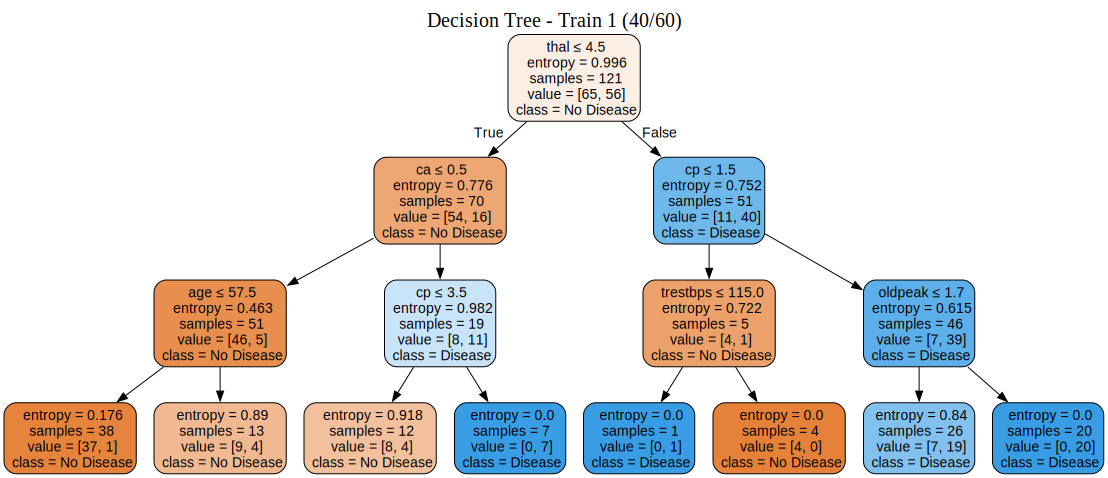

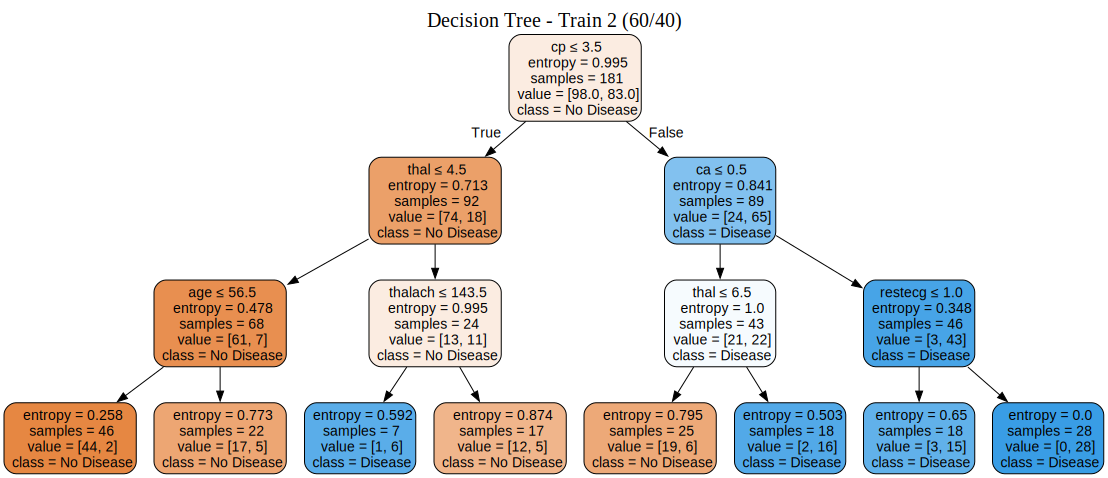

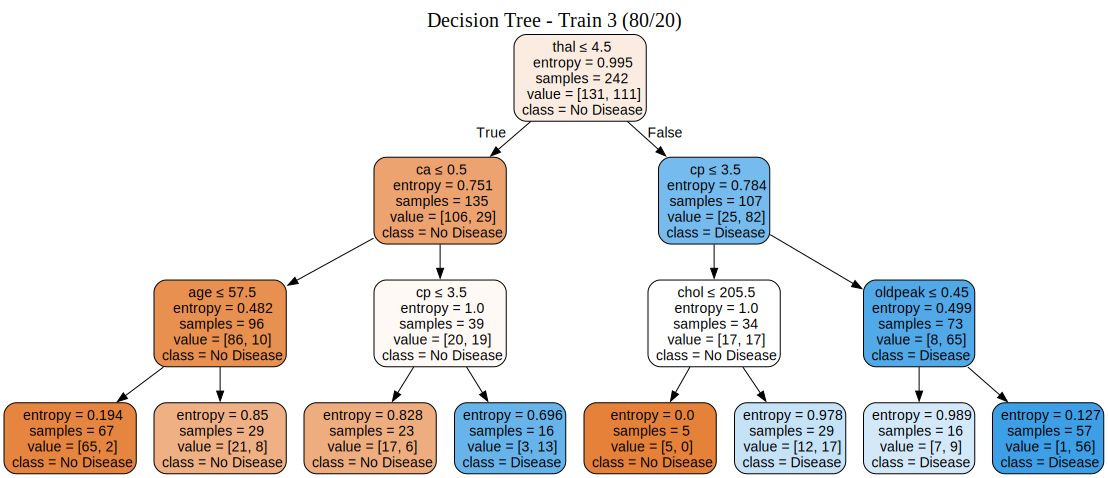

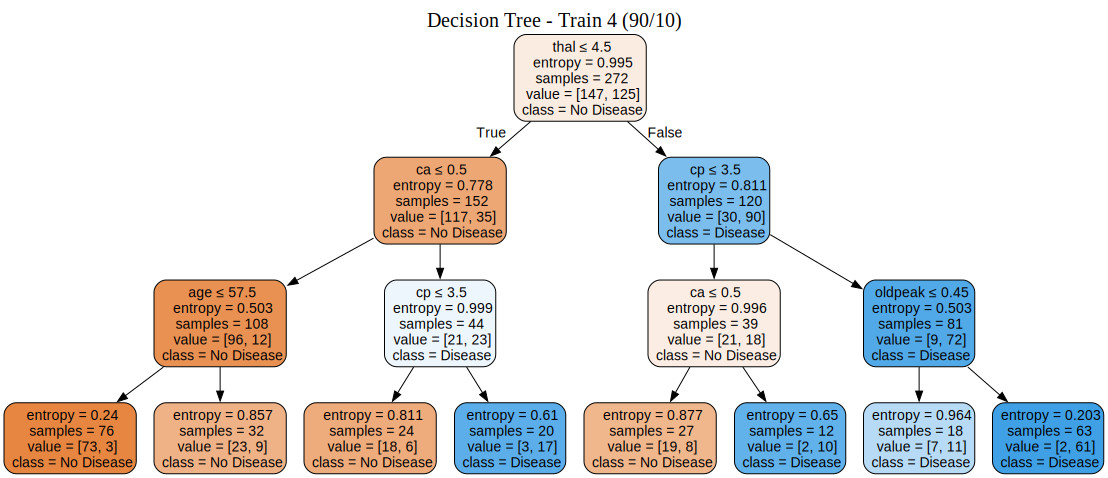

In [82]:
titles = [
    "Decision Tree - Train 1 (40/60)",
    "Decision Tree - Train 2 (60/40)",
    "Decision Tree - Train 3 (80/20)",
    "Decision Tree - Train 4 (90/10)"
]
clfs = [clf1, clf2, clf3, clf4]
train_keys = ['40/60', '60/40', '80/20', '90/10']

for clf, key, title in zip(clfs, train_keys, titles):
    dot_data = export_graphviz(
        clf,
        feature_names=subsets[key]['X_train'].columns,
        class_names=['No Disease', 'Disease'],
        filled=True,
        rounded=True,
        special_characters=True
    )
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="{title}"; labelloc=top; fontsize=20;'
    )
    graph = graphviz.Source(dot_data)
    display(graph)

# 6. Đánh giá cây quyết định

Đánh giá hiệu suất từng mô hình trên tập kiểm tra bằng confusion_matrix và classification_report. Giải thích ý nghĩa các chỉ số và nhận xét về hiệu suất mô hình.


=== Đánh giá Decision Tree (Test set 40/60) ===
Confusion Matrix:


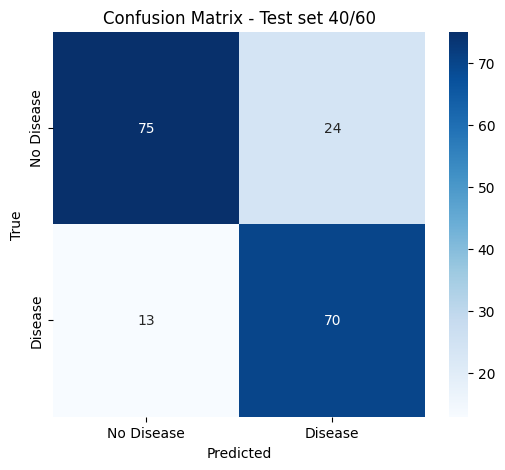

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.76      0.80        99
     Disease       0.74      0.84      0.79        83

    accuracy                           0.80       182
   macro avg       0.80      0.80      0.80       182
weighted avg       0.80      0.80      0.80       182

Accuracy: 0.7967

=== Đánh giá Decision Tree (Test set 60/40) ===
Confusion Matrix:


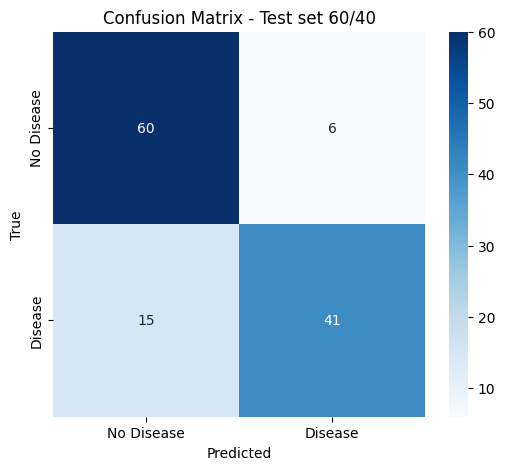

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.91      0.85        66
     Disease       0.87      0.73      0.80        56

    accuracy                           0.83       122
   macro avg       0.84      0.82      0.82       122
weighted avg       0.83      0.83      0.83       122

Accuracy: 0.8279

=== Đánh giá Decision Tree (Test set 80/20) ===
Confusion Matrix:


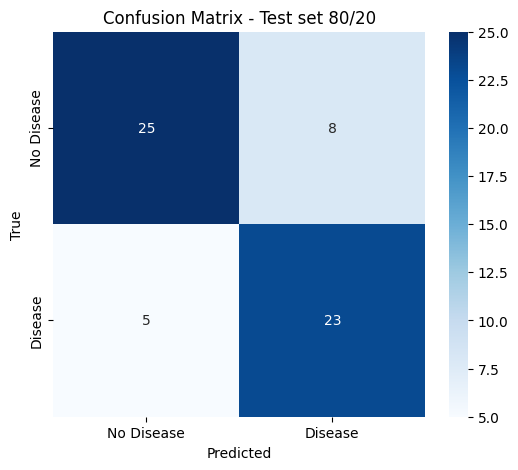

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.83      0.76      0.79        33
     Disease       0.74      0.82      0.78        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Accuracy: 0.7869

=== Đánh giá Decision Tree (Test set 90/10) ===
Confusion Matrix:


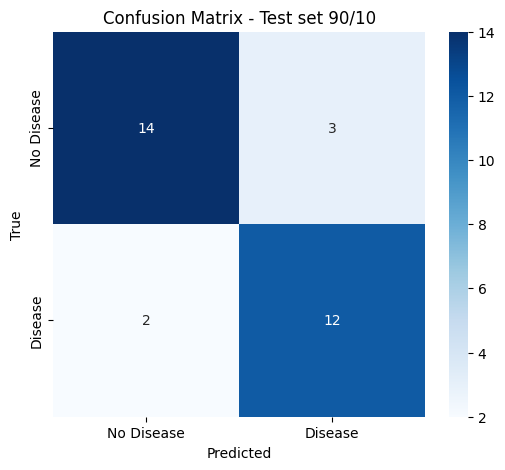

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.82      0.85        17
     Disease       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Accuracy: 0.8387


In [83]:
for clf, key in zip(clfs, train_keys):
    X_test = subsets[key]['X_test']
    y_test = subsets[key]['y_test']
    y_pred = clf.predict(X_test)
    print(f"\n=== Đánh giá Decision Tree (Test set {key}) ===")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Test set {key}')
    plt.show()
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

## Nhận xét về đánh giá mô hình Decision Tree trên tập Heart Disease

- **Độ chính xác tổng thể (accuracy)** của các mô hình dao động từ khoảng **0.79 đến 0.84** trên các tập test với các tỷ lệ chia khác nhau (40/60, 60/40, 80/20, 90/10). Điều này cho thấy mô hình Decision Tree với `max_depth=3` có khả năng phân loại khá ổn định và tốt trên dữ liệu bệnh tim.

- **Precision và Recall** của hai lớp ("No Disease" và "Disease") khá cân bằng ở tất cả các tỷ lệ chia. Không có lớp nào bị bỏ sót hoàn toàn hoặc bị dự đoán nhầm quá nhiều. Điều này chứng tỏ mô hình không bị thiên lệch về một lớp cụ thể.

- **F1-score** cho cả hai lớp đều ở mức cao (gần 0.8 trở lên), cho thấy mô hình giữ được sự cân bằng giữa precision và recall, phù hợp cho các bài toán y tế cần hạn chế cả hai loại lỗi.

- **Macro avg** và **weighted avg** đều xấp xỉ với accuracy, cho thấy mô hình hoạt động đồng đều trên cả hai lớp, không bị ảnh hưởng bởi sự mất cân bằng nhãn.

- **Kết quả ổn định**: Khi thay đổi tỷ lệ train/test, độ chính xác và các chỉ số khác không biến động mạnh, chứng tỏ mô hình có tính tổng quát tốt trên dữ liệu này.

**Kết luận:**  
- Mô hình Decision Tree với `max_depth=3` cho kết quả tốt và ổn định trên bài toán phân loại bệnh tim, với độ chính xác và các chỉ số đánh giá đều ở mức cao và cân bằng giữa hai lớp.
- Để cải thiện thêm, có thể thử tăng độ sâu cây hoặc kết hợp thêm các đặc trưng, nhưng với cấu hình hiện tại, mô hình đã đáp ứng tốt yêu cầu phân loại cơ bản.

# 7. PHÂN TÍCH ẢNH HƯỞNG ĐỘ SÂU CỦA CÂY

- Sử dụng tập chia 80/20.
- Thử nghiệm các giá trị max_depth khác nhau.
- Trực quan hóa cây và so sánh độ chính xác.

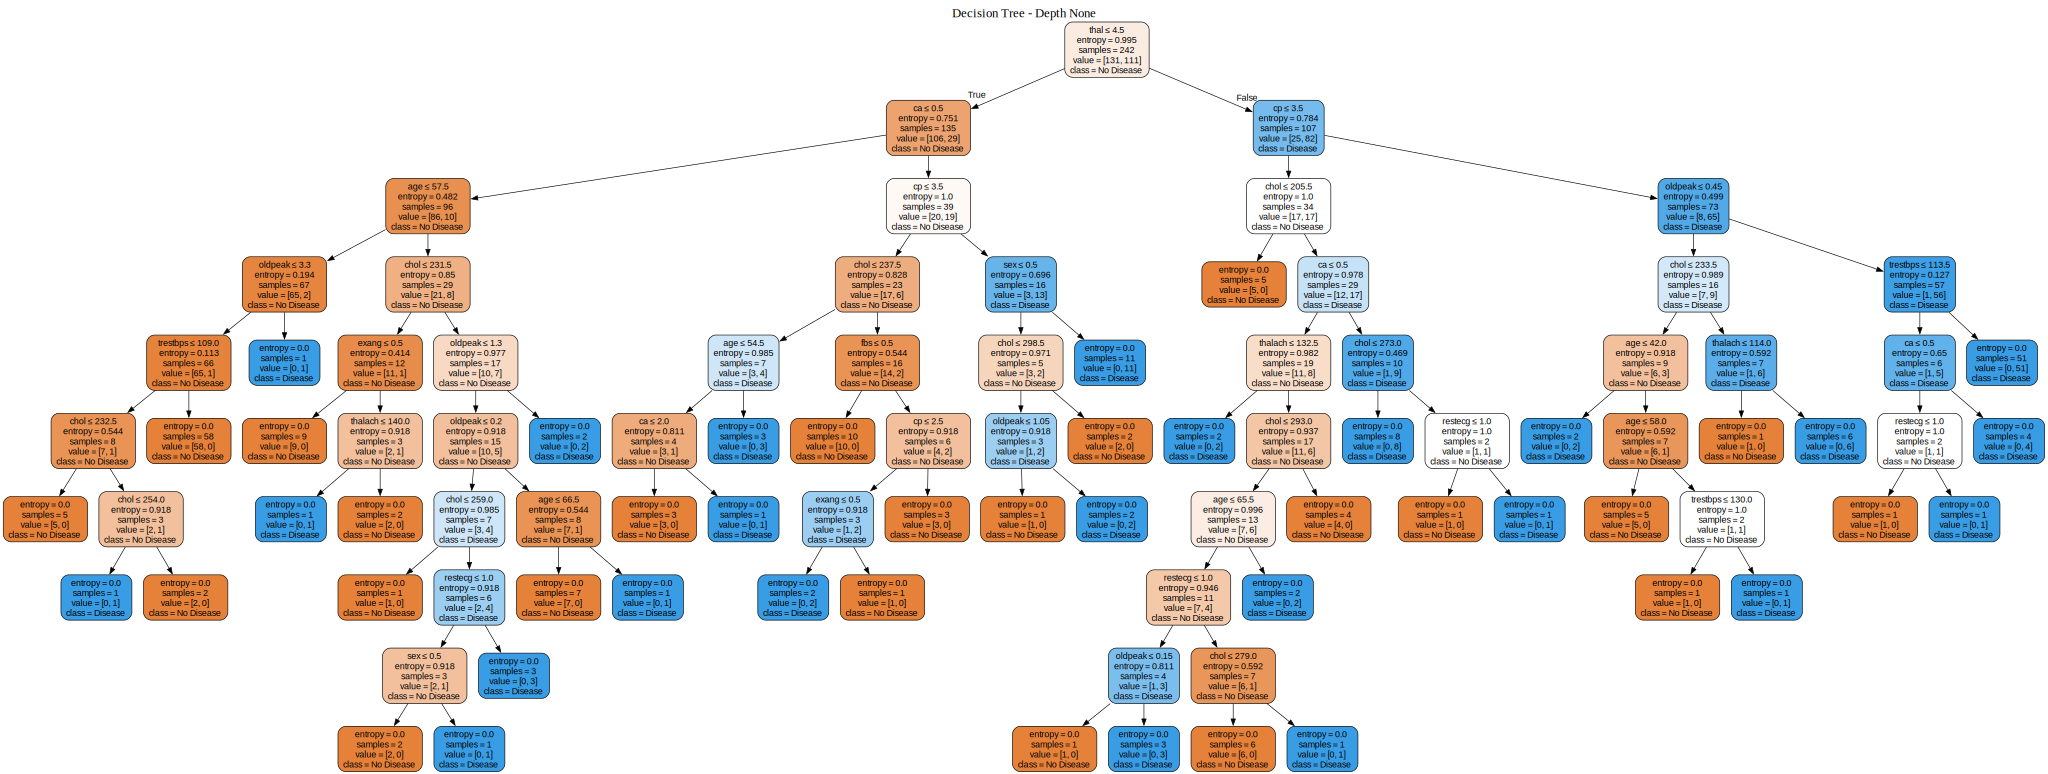

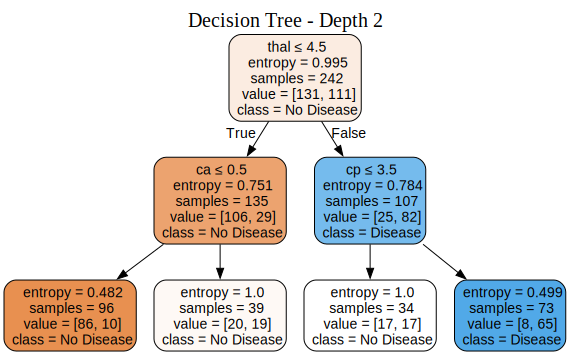

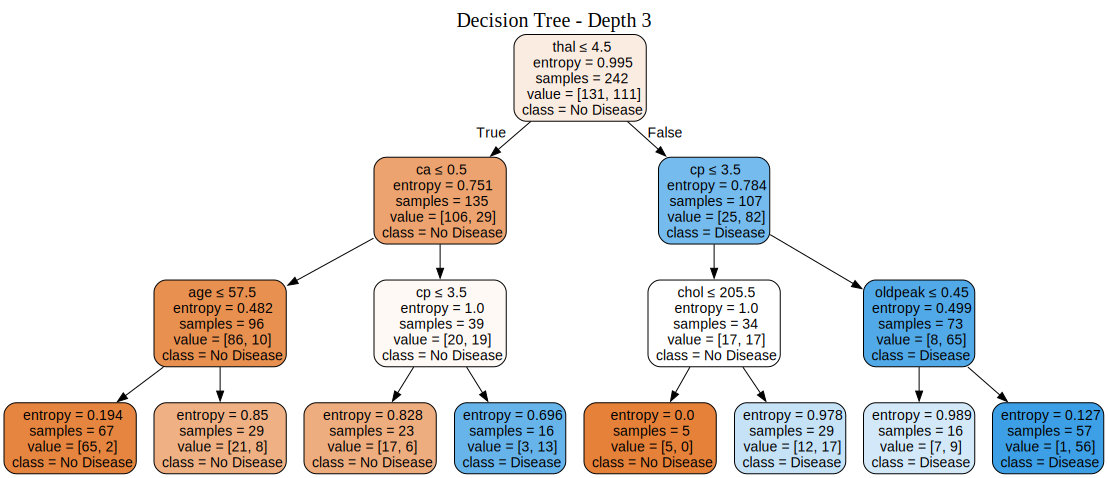

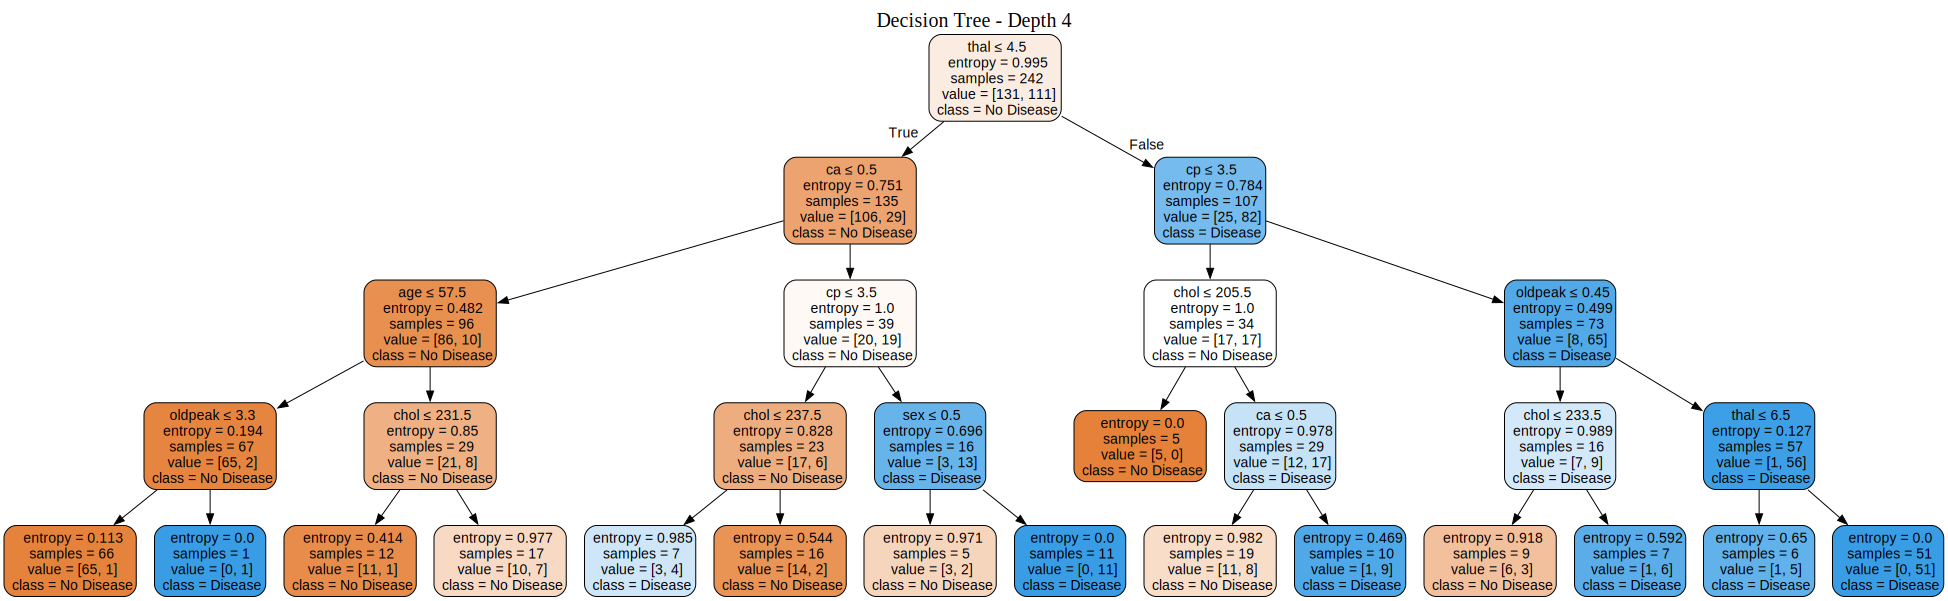

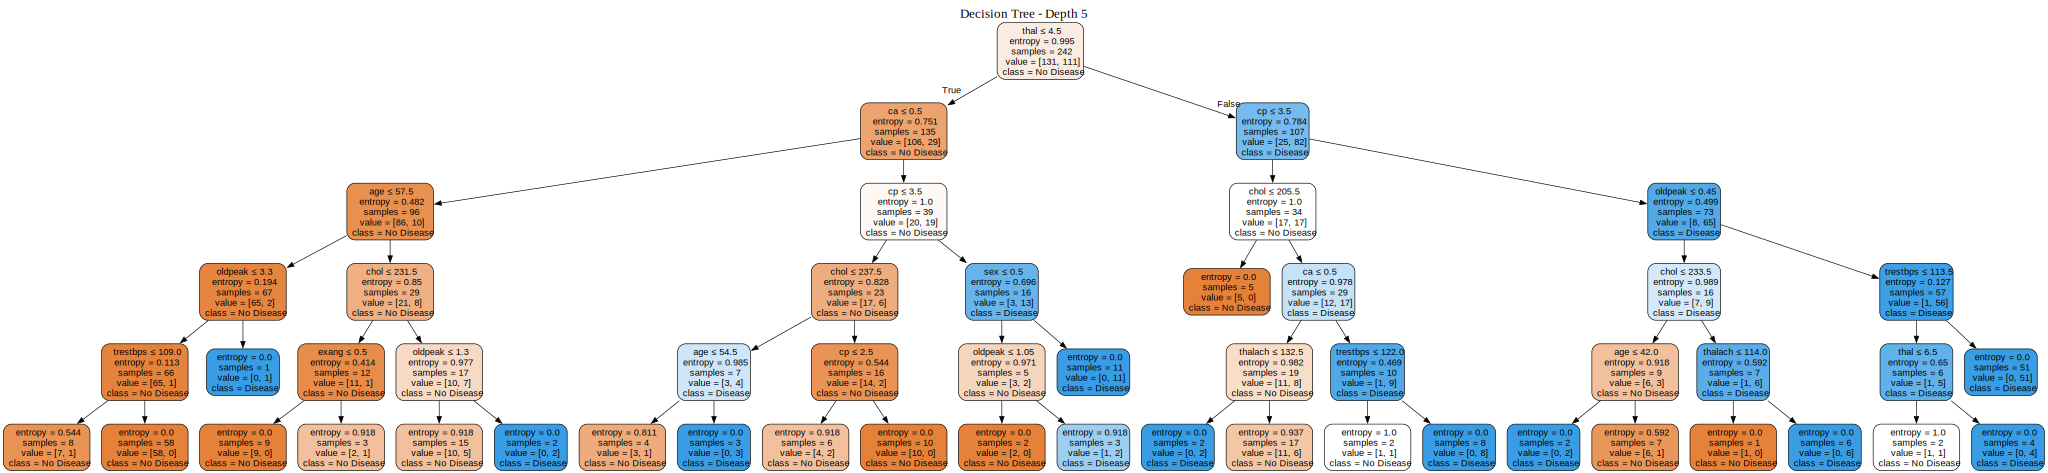

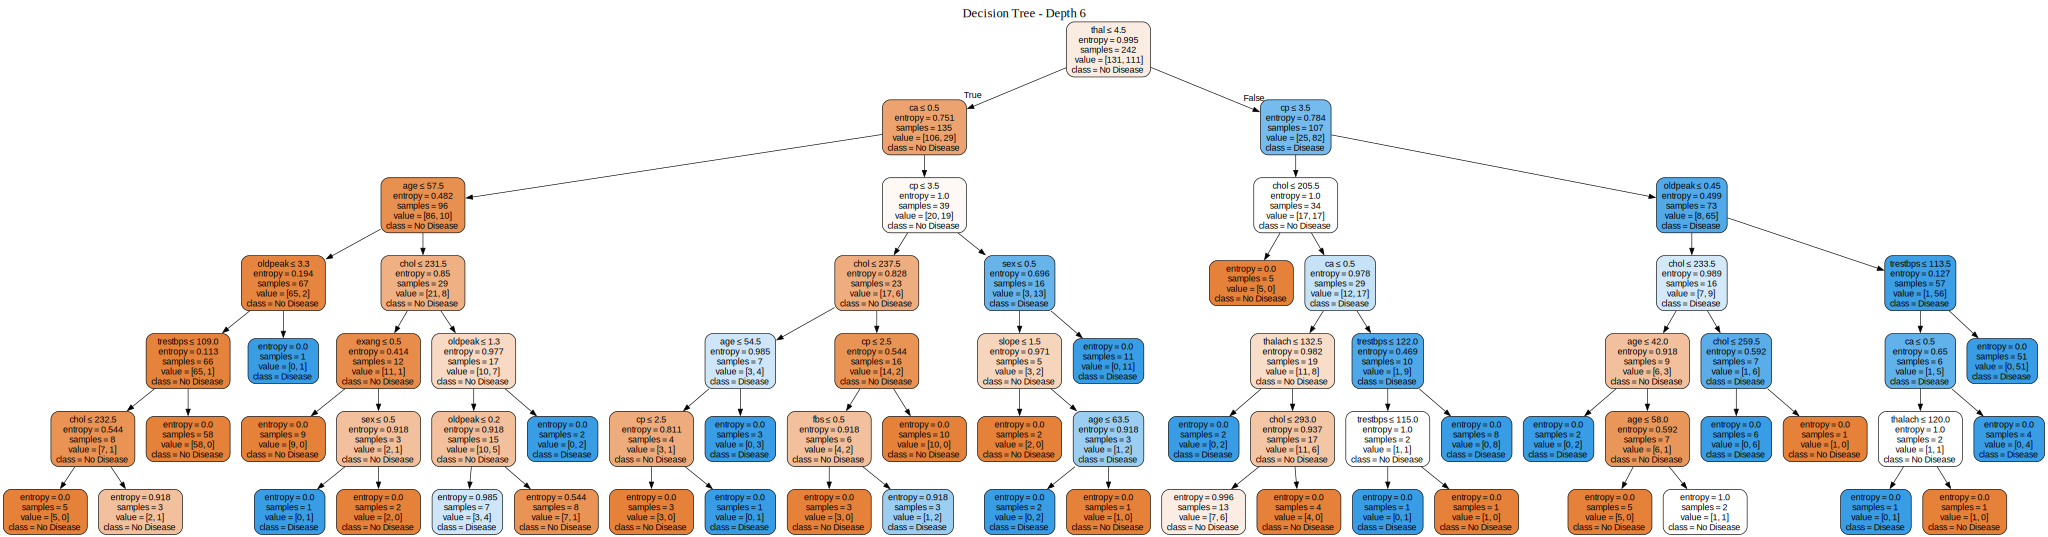

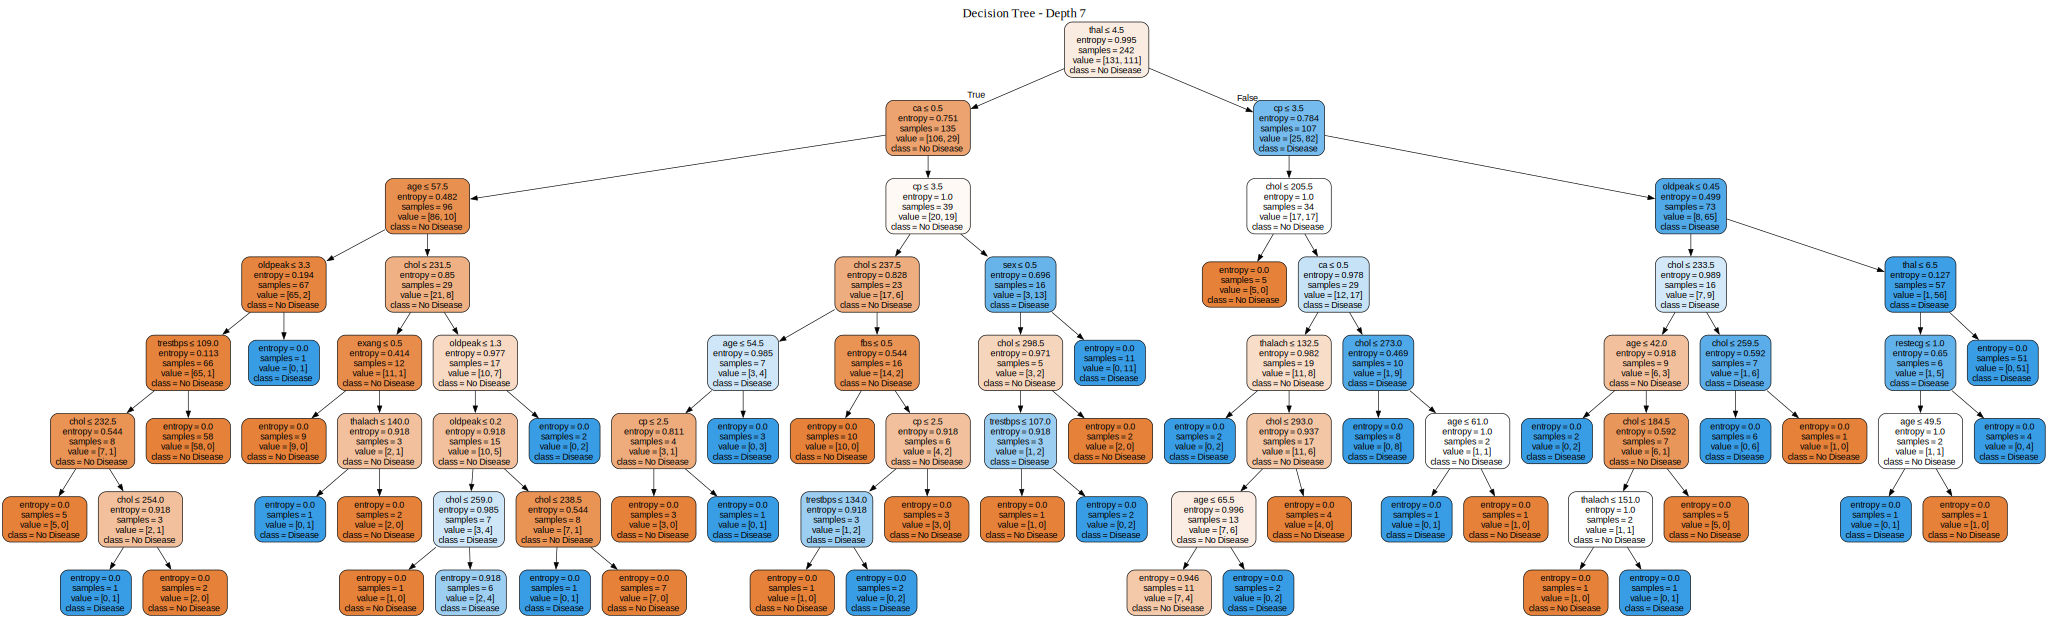

Max Depth | Test Accuracy
-------------------------
     None | 0.7705
        2 | 0.7705
        3 | 0.7869
        4 | 0.7869
        5 | 0.8033
        6 | 0.7049
        7 | 0.6885


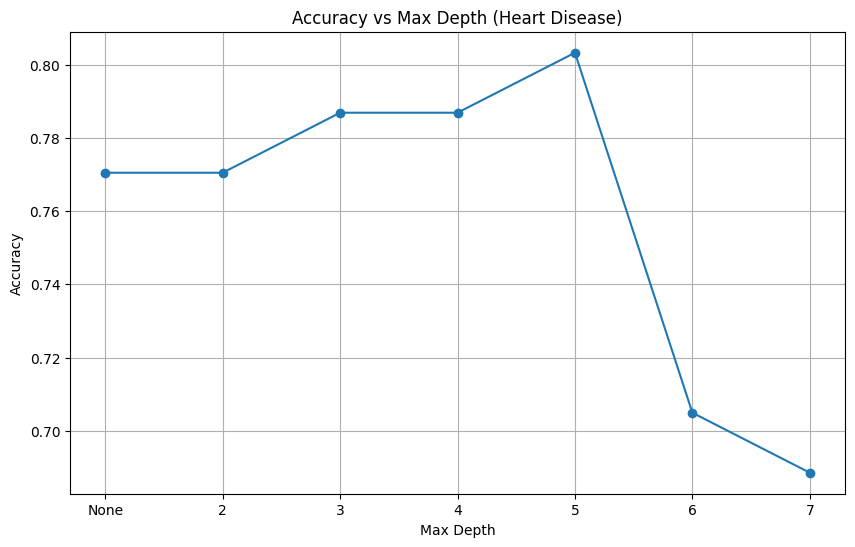

In [84]:
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = {}

for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    clf.fit(subsets['80/20']['X_train'], subsets['80/20']['y_train'])
    y_pred = clf.predict(subsets['80/20']['X_test'])
    acc = accuracy_score(subsets['80/20']['y_test'], y_pred)
    accuracy_results[depth] = acc

    dot_data = export_graphviz(
        clf,
        feature_names=subsets['80/20']['X_train'].columns,
        class_names=['No Disease', 'Disease'],
        filled=True,
        rounded=True,
        special_characters=True
    )
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Depth {depth}"; labelloc=top; fontsize=20;'
    )
    graph = graphviz.Source(dot_data)
    display(graph)

print("Max Depth | Test Accuracy")
print("-------------------------")
for depth, acc in accuracy_results.items():
    depth_str = "None" if depth is None else str(depth)
    print(f"{depth_str:>9} | {acc:.4f}")

x_values = [1 if d is None else d for d in max_depth_values]
y_values = list(accuracy_results.values())

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.title('Accuracy vs Max Depth (Heart Disease)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.xticks(x_values, labels=[str(d) if d is not None else 'None' for d in max_depth_values])
plt.show()

### Nhận xét

- Độ chính xác kiểm tra (test accuracy) thấp nhất khi max_depth là 6 và 7, chỉ đạt khoảng **0.70** và **0.69**, cho thấy mô hình bị overfitting khi cây quá sâu.
- Khi max_depth nhỏ (2, 3, 4), độ chính xác dao động từ **0.77** đến **0.79**. Đặc biệt, độ chính xác cao nhất đạt **0.8033** ở max_depth=5.
- Khi max_depth=None (không giới hạn), độ chính xác chỉ đạt **0.7705**, không cao hơn so với các giá trị max_depth nhỏ hơn, chứng tỏ việc để cây phát triển tự do không giúp cải thiện hiệu quả mà còn làm giảm khả năng tổng quát hóa.
- Kết quả này cho thấy với dữ liệu Heart Disease, cây quyết định quá sâu sẽ dẫn đến overfitting, làm giảm hiệu quả dự đoán trên tập kiểm tra.
- **Độ sâu tối ưu cho mô hình này là 5**, tại đó mô hình đạt hiệu quả dự đoán tốt nhất trên tập kiểm tra.
- Việc lựa chọn độ sâu phù hợp giúp mô hình học tốt mà vẫn kiểm soát được độ phức tạp, tránh overfitting.

**Kết luận:**  
Nên chọn max_depth=5 cho cây quyết định trên dữ liệu Heart Disease để đạt hiệu quả dự đoán tốt nhất và tránh overfitting.